In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# 数据所在文件夹
base_dir = 'G:\dogs_and_cats'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
# 训练集
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# 验证集
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [3]:
## 构建神经网络模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPool2D(2, 2),

    # 为全连接层准备
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    # 由于是二分类任务 使用sigmoid激活函数就够了
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [5]:
# 数据预处理操作
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [6]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                  target_size=(64, 64),
                                  batch_size=250,
                                  # 如果是多分类问题就使用categorical
                                  class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                  target_size=(64, 64),
                                  batch_size=20,
                                  # 如果是多分类问题就使用categorical
                                  class_mode='binary')

Found 24462 images belonging to 2 classes.
Found 538 images belonging to 2 classes.


In [7]:
# 训练网络模型

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=tf.keras.losses.binary_crossentropy, metrics=['acc'])

with tf.device('/GPU') as f:
    history = model.fit(train_generator,
                    steps_per_epoch=50,  # images >= batch_size * steps
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=20,  # images >= batch_size * steps
                    verbose=2)

Epoch 1/20
50/50 - 19s - loss: 0.6763 - acc: 0.5751 - val_loss: 0.6439 - val_acc: 0.6375 - 19s/epoch - 371ms/step
Epoch 2/20
50/50 - 16s - loss: 0.6390 - acc: 0.6356 - val_loss: 0.6285 - val_acc: 0.6325 - 16s/epoch - 326ms/step
Epoch 3/20
50/50 - 14s - loss: 0.6036 - acc: 0.6696 - val_loss: 0.5984 - val_acc: 0.6600 - 14s/epoch - 282ms/step
Epoch 4/20
50/50 - 17s - loss: 0.5865 - acc: 0.6892 - val_loss: 0.5685 - val_acc: 0.6875 - 17s/epoch - 331ms/step
Epoch 5/20
50/50 - 15s - loss: 0.5664 - acc: 0.7065 - val_loss: 0.5374 - val_acc: 0.7225 - 15s/epoch - 302ms/step
Epoch 6/20
50/50 - 14s - loss: 0.5403 - acc: 0.7266 - val_loss: 0.5422 - val_acc: 0.7025 - 14s/epoch - 290ms/step
Epoch 7/20
50/50 - 15s - loss: 0.5255 - acc: 0.7382 - val_loss: 0.5056 - val_acc: 0.7575 - 15s/epoch - 306ms/step
Epoch 8/20
50/50 - 14s - loss: 0.5120 - acc: 0.7509 - val_loss: 0.5124 - val_acc: 0.7550 - 14s/epoch - 286ms/step
Epoch 9/20
50/50 - 14s - loss: 0.4976 - acc: 0.7610 - val_loss: 0.4804 - val_acc: 0.7575

In [10]:
history.history

{'loss': [0.6762932538986206,
  0.6390456557273865,
  0.6036273241043091,
  0.5865259170532227,
  0.5664443969726562,
  0.5402652025222778,
  0.5255303978919983,
  0.5119525194168091,
  0.49759620428085327,
  0.48281046748161316,
  0.47445711493492126,
  0.4732639789581299,
  0.46930184960365295,
  0.45040208101272583,
  0.4471762478351593,
  0.4406050145626068,
  0.43455711007118225,
  0.4237646162509918,
  0.4146767556667328,
  0.414328396320343],
 'acc': [0.5751083493232727,
  0.6356122493743896,
  0.6696357131004333,
  0.6891999840736389,
  0.7065479159355164,
  0.726639986038208,
  0.7382442355155945,
  0.7509227991104126,
  0.7609533071517944,
  0.7722676992416382,
  0.777679979801178,
  0.7760000228881836,
  0.7784000039100647,
  0.7879955172538757,
  0.7913657426834106,
  0.7984799742698669,
  0.8018777370452881,
  0.8066120743751526,
  0.811680018901825,
  0.8130316138267517],
 'val_loss': [0.6439021229743958,
  0.6284745931625366,
  0.5984306335449219,
  0.5684611797332764,
 

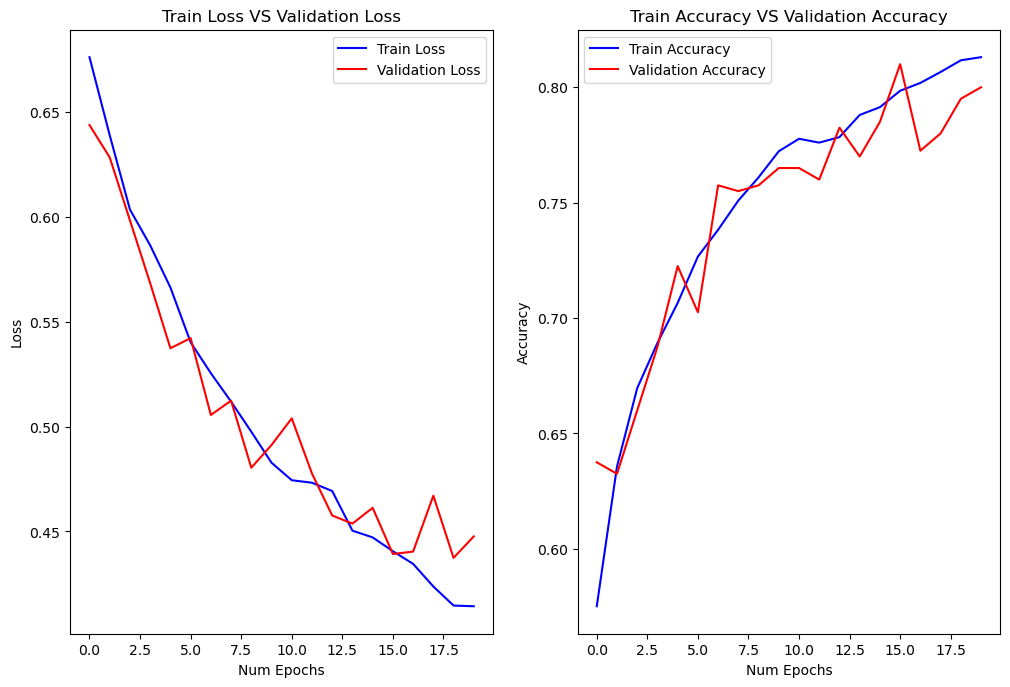

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8), dpi=100)
plt.rcParams['figure.facecolor'] = 'white'
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = history.epoch

train_acc = history.history['acc']
val_acc = history.history['val_acc']

plt.subplot(121)
plt.plot(epochs, train_loss, 'b-', label='Train Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.legend()
plt.xlabel('Num Epochs')
plt.ylabel('Loss')
plt.title('Train Loss VS Validation Loss')

plt.subplot(122)
plt.plot(epochs, train_acc, 'b-', label='Train Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.legend()
plt.xlabel('Num Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy VS Validation Accuracy')
plt.show()